In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree,  _tree

In [2]:
dataset_path = '../../data/'
dataset_file = 'competencia_01.csv'

ganancia_acierto = 780000
costo_estimulo = 20000

In [3]:
data = pd.read_csv(dataset_path+dataset_file)
#data = data[data['foto_mes'] == 202104]

X = data.drop('target', axis=1)
y = data['target']


In [4]:
data["promedio_rentabilidad"] = data.groupby("numero_de_cliente")["mrentabilidad"].transform("mean")

# row_number con PARTITION BY + ORDER BY

In [6]:
data['promedio_rentabilidad']

0         6575.491667
1         6575.491667
2         6575.491667
3         6575.491667
4         6575.491667
             ...     
978434    -114.020000
978435       0.000000
978436      53.510000
978437       0.000000
978438       0.000000
Name: promedio_rentabilidad, Length: 978439, dtype: float64

<Axes: xlabel='promedio_rentabilidad', ylabel='target'>

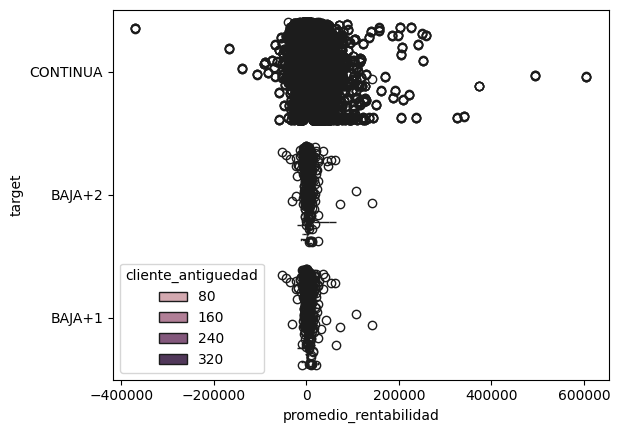

In [9]:
sns.boxplot(data=data,x=data['promedio_rentabilidad'],y=data['target'],hue=data['cliente_antiguedad'])

<Axes: xlabel='target', ylabel='promedio_rentabilidad'>

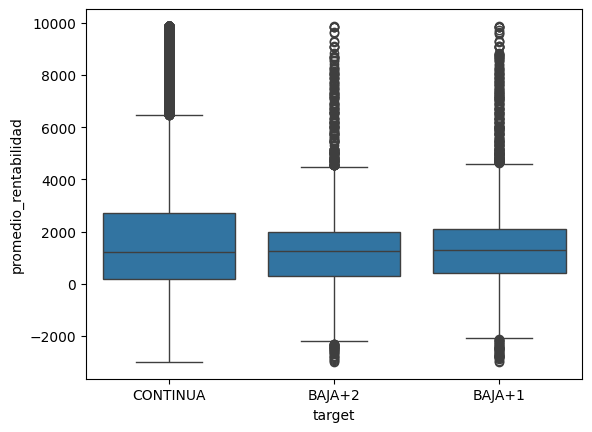

In [10]:
lower_bound = data['promedio_rentabilidad'].quantile(0.05)
upper_bound = data['promedio_rentabilidad'].quantile(0.95)

filtered_data = data[(data['promedio_rentabilidad'] >= lower_bound) & (data['promedio_rentabilidad'] <= upper_bound)]
sns.boxplot(x='target', y='promedio_rentabilidad', data=filtered_data)